<a href="https://colab.research.google.com/github/Ritika2001-tech/Chatbot_Langgraph/blob/main/langgrapg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.5/411.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25


In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('lang_smith')


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = "langsmith"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ChatLanggraph"

In [ ]:
from langchain_groq import ChatGroq


In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f87dba126e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f87dba10280>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Building chatbot --> Langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


#stategraph for state management purpose
#message - for keeping track (when user giving query -> llm reponse --> message added and state of chatbot also change )


In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)
# message have the type "list" the 'add_messages' function
# in annoation defines how this state key should be updated
# append message to list rather than overwritten them


In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [ ]:
graph = graph_builder.compile()

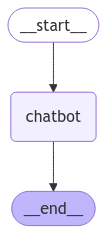

In [ ]:
#display
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("BYE")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.4e-07, 'queue_time': 0.0044423100000000005, 'total_time': 0.027273067}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-41b007b7-3a16-4316-a0d0-06915a7db6b6-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.4e-07, 'queue_time': 0.0044423100000000005, 'total_time': 0.027273067}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='r

User: What is Langchain


dict_values([{'messages': AIMessage(content='LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs). \n\nThink of it like a toolbox specifically built for working with powerful AI like me. \n\nHere\'s a breakdown of what LangChain does:\n\n**1. Chains:**\n\n* LangChain\'s core concept is "chains," which are sequences of LLMs and other components working together to accomplish a specific task. \n* Imagine you want to write a summary of a long article. A LangChain chain could:\n    * **Fetch** the article text.\n    * **Process** it to understand the main points.\n    * **Generate** a concise summary using an LLM.\n\n**2. Components:**\n\n* LangChain provides a wide range of pre-built components that you can easily integrate into your chains:\n    * **LLMs:**  Connects to various LLMs like me (OpenAI\'s GPT models), Llama 2, and more.\n    * **Memory:** Allows your chains to remember past interactions, enabling m

User: q
BYE


## Langgraph chatbot with tools

In [1]:
!pip install langgraph langsmith langchain_groq langchain_community

In [2]:
from typing import Annotated
from typing_extensions import TypedDict


In [3]:
!pip install arxiv wikipedia


In [4]:
## Working with tool
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
## Axriv and wekipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=1000)
arxiv_tool=ArxivQueryRun(api_wrapper = arxiv_wrapper)

api_wrapper =WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=1000)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [5]:
wiki_tool.invoke("who is albert einstein")

"Page: Einstein family\nSummary: The Einstein family is the family of physicist Albert Einstein (1879–1955). Einstein's great-great-great-great-grandfather, Jakob Weil, was his oldest recorded relative, born in the late 17th century, and the family continues to this day. Albert Einstein's great-great-grandfather, Löb Moses Sontheimer (1745–1831), was also the grandfather of the tenor Heinrich Sontheim (1820–1912) of Stuttgart.\nAlbert's three children were from his relationship with his first wife, Mileva Marić, his daughter Lieserl being born a year before they married. Albert Einstein's second wife was Elsa Einstein, whose mother Fanny Koch was the sister of Albert's mother, and whose father, Rudolf Einstein, was the son of Raphael Einstein, a brother of Albert's paternal grandfather. Albert and Elsa were thus first cousins through their mothers and second cousins through their fathers."

In [6]:
## Langgraph Application
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [7]:
from langchain_groq import ChatGroq
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c7b1a031600>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c7b1a0321d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
tools=[wiki_tool]
llm_with_tools = llm.bind_tools(tools=tools)

In [9]:
def chatbot(state:State):
  return {"messages":llm_with_tools.invoke(state['messages'])}
##chatbot interacts with tool

In [10]:
from langgraph.prebuilt import ToolNode,tools_condition

In [11]:
graph_builder.add_node("chatbott",chatbot)
graph_builder.add_edge(START,"chatbott")
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges(
    "chatbott",
    tools_condition
) #for bidirectional interaction of chatbot and tools
graph_builder.add_edge("tools","chatbott")
graph_builder.add_edge("chatbott",END)

In [12]:
graph = graph_builder.compile()

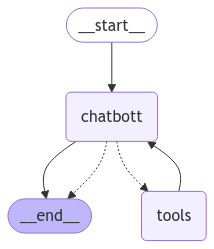

In [13]:
#display
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))